In [129]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [130]:
_split = 0.7

## Arima for VCB dataset

In [131]:
data_path = '../../Dataset/VCB.csv';

In [132]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [133]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2339 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2339 non-null   float64
dtypes: float64(1)
memory usage: 36.5 KB
None
              Close
count   2339.000000
mean   49573.071881
std    22421.327527
min    15680.371094
25%    25332.525391
50%    50432.792969
75%    66027.140625
max    97400.000000


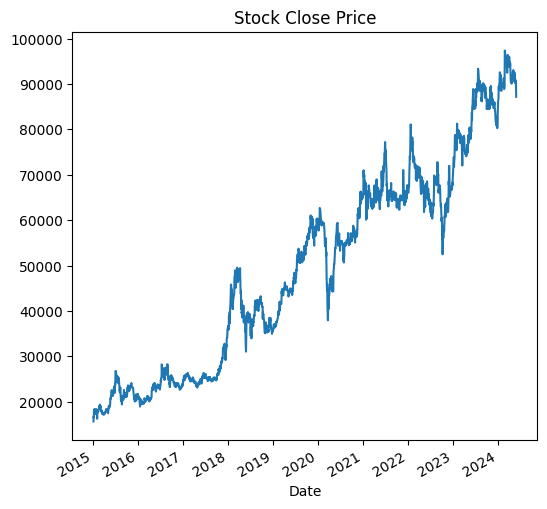

In [134]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [135]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [136]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1637, 1)
Test set shape: (702, 1)


In [137]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -0.7272181228151362
Initial p-value: 0.8395729143966156
Differencing Level: 1
ADF Statistic: -29.724375692103642
p-value: 0.0
Series became stationary after 1 differencing levels.


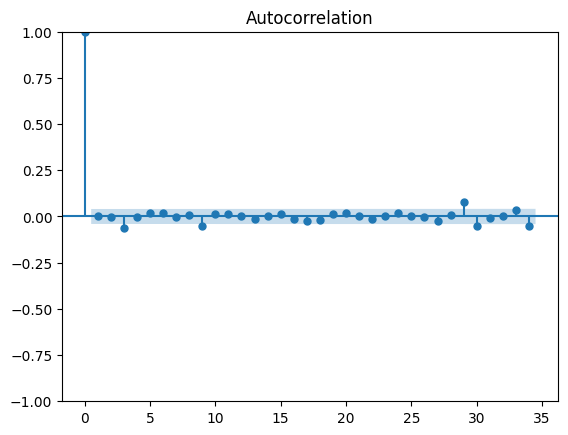

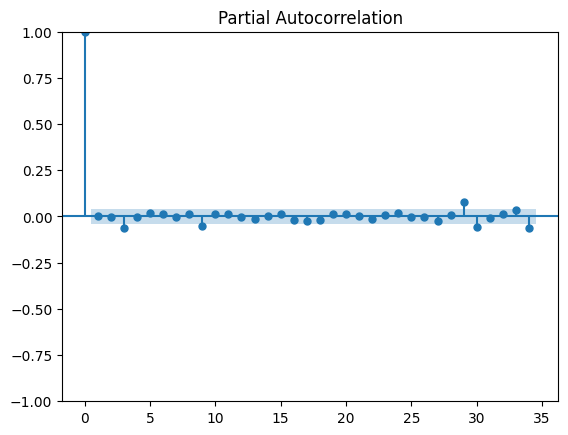

In [138]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [139]:
model = ARIMA(train_data, order=(0, 1, 0))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [140]:
model_fit = model.fit()

In [141]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1637
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -13246.256
Date:                Thu, 20 Jun 2024   AIC                          26494.512
Time:                        17:00:07   BIC                          26499.912
Sample:                             0   HQIC                         26496.515
                               - 1637                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.309e+05   1.22e+04     51.608      0.000    6.07e+05    6.55e+05
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1417.80
Prob(Q):                              0.76   Pr

In [142]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [143]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_24272\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2021-07-28,64368.171875,63040.992188
2021-07-29,64965.402344,63040.992188
2021-07-30,65031.757812,63040.992188
2021-08-02,64368.171875,63040.992188
2021-08-03,65562.632812,63040.992188
...,...,...
2024-05-27,90200.000000,63040.992188
2024-05-28,90700.000000,63040.992188
2024-05-29,89800.000000,63040.992188


In [144]:
start = len(data) + 1
end = len(data) + 90
predict_90_days = model_fit.predict(start=start, end=end)
predict_90_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2340    63040.992188
2341    63040.992188
2342    63040.992188
2343    63040.992188
2344    63040.992188
            ...     
2425    63040.992188
2426    63040.992188
2427    63040.992188
2428    63040.992188
2429    63040.992188
Name: predicted_mean, Length: 90, dtype: float64

In [145]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [146]:
predict_90_days = pd.Series(predict_90_days.values, index=generate_date_array(test_data.index[-1], 90))
predict_90_days.index.name = 'Date'

In [147]:
predict_30_days = predict_90_days[:30]
predict_60_days = predict_90_days[:60]

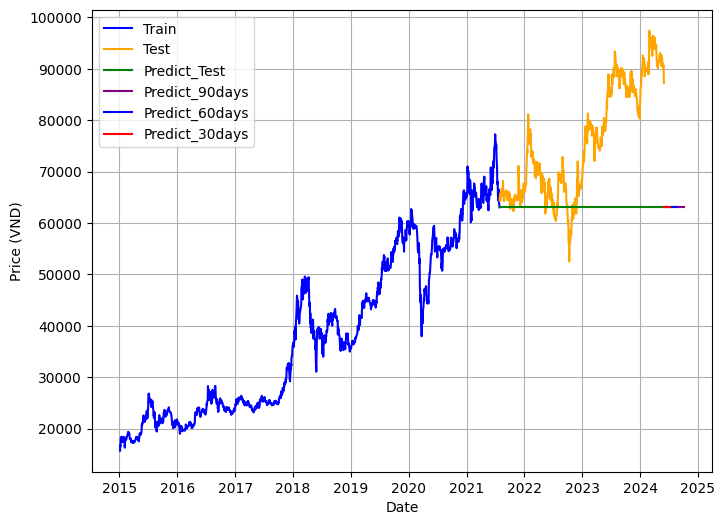

In [148]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(train_data.index, train_data['Close'], label='Train', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test', color='orange')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_90_days.index, predict_90_days, label='Predict_90days', color='purple')
plt.plot(predict_60_days.index, predict_60_days, label='Predict_60days', color='blue')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='red')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.grid(True)
plt.legend()
plt.show()

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 16595.984
MAE: 12940.214
MAPE: 15.568


## Arima for BID dataset

In [150]:
data_path = '../../Dataset/BID.csv';

In [151]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [152]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   25785.842410
std    10557.656795
min     9101.712891
25%    15240.078125
50%    26740.693359
75%    32138.220703
max    54400.000000


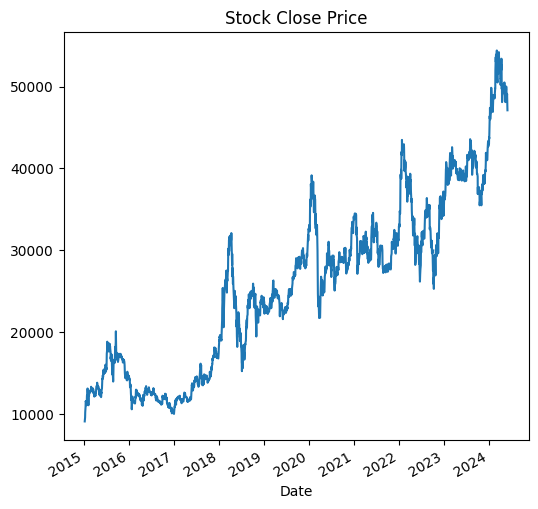

In [153]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [154]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [155]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1641, 1)
Test set shape: (704, 1)


In [156]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.0662395859139857
Initial p-value: 0.7283457408139377
Differencing Level: 1
ADF Statistic: -50.07262520728113
p-value: 0.0
Series became stationary after 1 differencing levels.


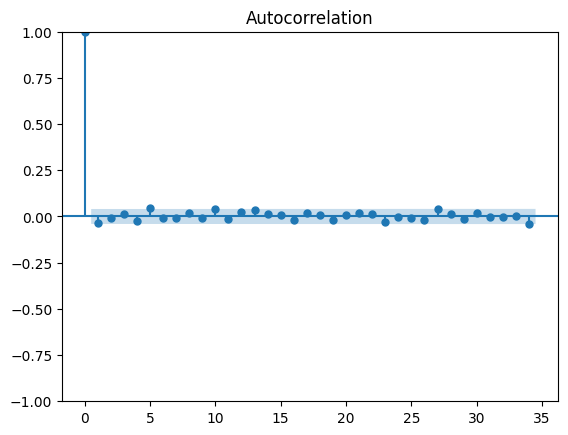

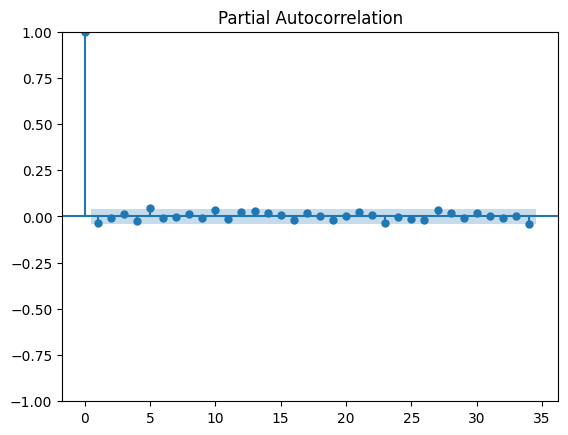

In [157]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [158]:
model = ARIMA(train_data, order=(0, 1, 0))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [159]:
model_fit = model.fit()

In [160]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1641
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -12627.845
Date:                Thu, 20 Jun 2024   AIC                          25257.690
Time:                        17:00:08   BIC                          25263.092
Sample:                             0   HQIC                         25259.693
                               - 1641                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.853e+05   6292.865     45.338      0.000    2.73e+05    2.98e+05
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               669.91
Prob(Q):                              0.58   Pr

In [161]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [162]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_24272\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2021-08-03,30585.990234,30021.542969
2021-08-04,30339.044922,30021.542969
2021-08-05,30303.765625,30021.542969
2021-08-06,30268.488281,30021.542969
2021-08-09,30444.878906,30021.542969
...,...,...
2024-05-27,48900.000000,30021.542969
2024-05-28,49100.000000,30021.542969
2024-05-29,48600.000000,30021.542969


In [163]:
start = len(data) + 1
end = len(data) + 90
predict_90_days = model_fit.predict(start=start, end=end)
predict_90_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    30021.542969
2347    30021.542969
2348    30021.542969
2349    30021.542969
2350    30021.542969
            ...     
2431    30021.542969
2432    30021.542969
2433    30021.542969
2434    30021.542969
2435    30021.542969
Name: predicted_mean, Length: 90, dtype: float64

In [164]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [165]:
predict_90_days = pd.Series(predict_90_days.values, index=generate_date_array(test_data.index[-1], 90))
predict_90_days.index.name = 'Date'

In [166]:
predict_30_days = predict_90_days[:30]
predict_60_days = predict_90_days[:60]

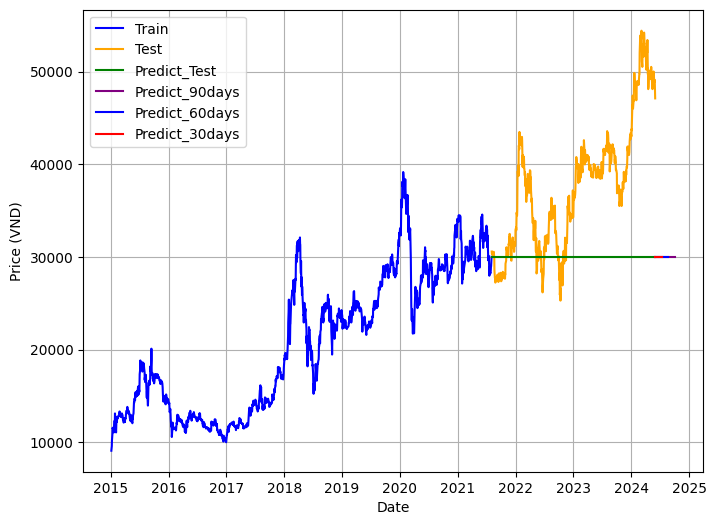

In [167]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(train_data.index, train_data['Close'], label='Train', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test', color='orange')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_90_days.index, predict_90_days, label='Predict_90days', color='purple')
plt.plot(predict_60_days.index, predict_60_days, label='Predict_60days', color='blue')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='red')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.grid(True)
plt.legend()
plt.show()

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 10079.951
MAE: 7954.857
MAPE: 19.105


## Arima for CTG dataset

In [169]:
data_path = '../../Dataset/CTG.csv';

In [170]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [171]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   19510.971566
std     7060.095727
min     9637.772461
25%    13451.279297
50%    16606.089844
75%    25729.027344
max    37719.050781


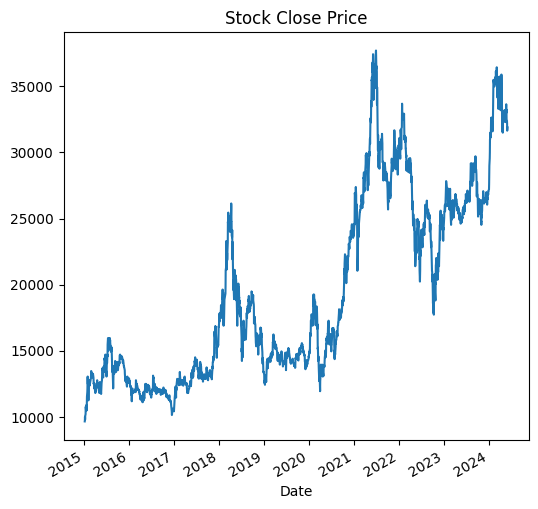

In [172]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [173]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [174]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (1641, 1)
Test set shape: (704, 1)


In [175]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.3022211165237332
Initial p-value: 0.6281555385005244
Differencing Level: 1
ADF Statistic: -51.10753306643303
p-value: 0.0
Series became stationary after 1 differencing levels.


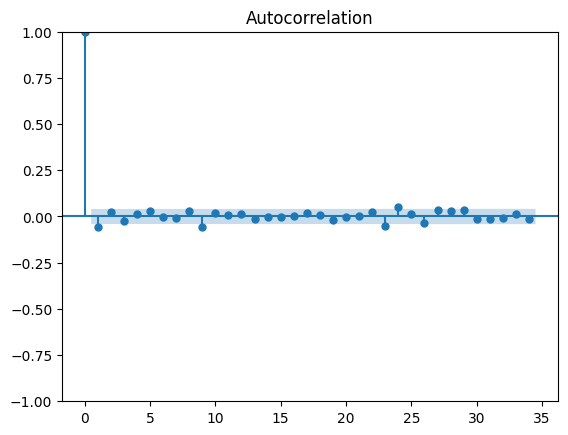

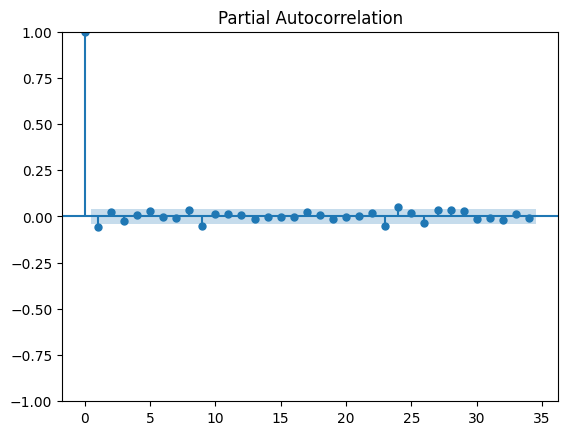

In [176]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [177]:
model = ARIMA(train_data, order=(0, 1, 0))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [178]:
model_fit = model.fit()

In [179]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1641
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -12211.492
Date:                Thu, 20 Jun 2024   AIC                          24424.983
Time:                        17:00:09   BIC                          24430.386
Sample:                             0   HQIC                         24426.987
                               - 1641                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.717e+05   3131.824     54.828      0.000    1.66e+05    1.78e+05
Ljung-Box (L1) (Q):                   2.08   Jarque-Bera (JB):              1990.79
Prob(Q):                              0.15   Pr

In [180]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [181]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_24272\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2021-08-03,30516.863281,30203.640625
2021-08-04,30427.371094,30203.640625
2021-08-05,30606.355469,30203.640625
2021-08-06,30561.609375,30203.640625
2021-08-09,30919.578125,30203.640625
...,...,...
2024-05-27,32400.000000,30203.640625
2024-05-28,32200.000000,30203.640625
2024-05-29,31650.000000,30203.640625


In [182]:
start = len(data) + 1
end = len(data) + 90
predict_90_days = model_fit.predict(start=start, end=end)
predict_90_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    30203.640625
2347    30203.640625
2348    30203.640625
2349    30203.640625
2350    30203.640625
            ...     
2431    30203.640625
2432    30203.640625
2433    30203.640625
2434    30203.640625
2435    30203.640625
Name: predicted_mean, Length: 90, dtype: float64

In [183]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [184]:
predict_90_days = pd.Series(predict_90_days.values, index=generate_date_array(test_data.index[-1], 90))
predict_90_days.index.name = 'Date'

In [185]:
predict_30_days = predict_90_days[:30]
predict_60_days = predict_90_days[:60]

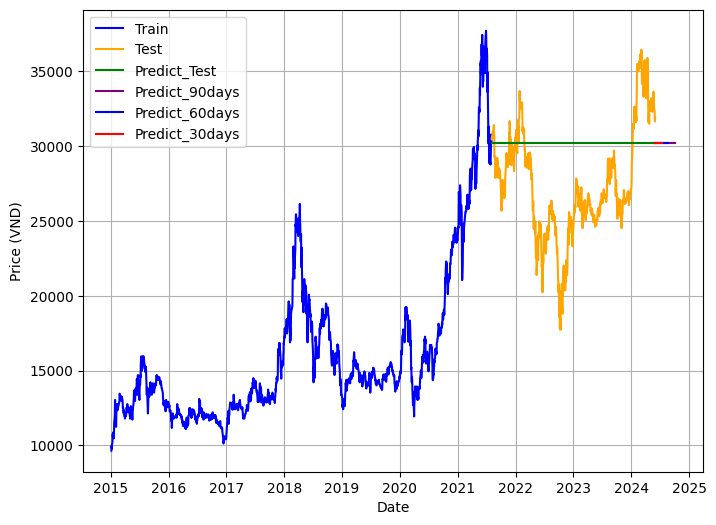

In [186]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(train_data.index, train_data['Close'], label='Train', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test', color='orange')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_90_days.index, predict_90_days, label='Predict_90days', color='purple')
plt.plot(predict_60_days.index, predict_60_days, label='Predict_60days', color='blue')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='red')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.grid(True)
plt.legend()
plt.show()

In [187]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 4599.286
MAE: 3915.266
MAPE: 15.521
